In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.attack import *
from src.create import *
from src.measure import *
import networkx as nx

In [2]:
e_file = "../../data/edge/edge.csv"
n_file = "../../data/vertex/vertex.csv"

G_train, df_n_train, df_e_train = paris_GenTranspNet(n_file,e_file,'train',1)
G_metro, df_n_metro, df_e_metro = paris_GenTranspNet(n_file,e_file,'metro',2)

edges_m_tr = "../../data/edge/edge_m_tr.csv"

G_intd_m_tr, e_m_tr = paris_GenMultiTranspNet(G_metro, G_train, edges_m_tr)

In [4]:
metro_ps, metro_p_inf, metro_p_inf_layer1, metro_p_inf_layer2 = generate_pinf_real(n_file, e_file, edges_m_tr, order = ["train","metro"], t=1)

...Interdependent Graph Generate Done! 0:00:00.260906
giant comp_set layer count:  0 117 117
...test: '0.000000' is Done! 0:00:00.488605
giant comp_set layer count:  0 117 117
...test: '0.052632' is Done! 0:00:00.451150
giant comp_set layer count:  3 168 171
...test: '0.105263' is Done! 0:00:00.500566
giant comp_set layer count:  0 117 117
...test: '0.157895' is Done! 0:00:00.547252
giant comp_set layer count:  3 131 134
...test: '0.210526' is Done! 0:00:00.463979
giant comp_set layer count:  2 125 127
...test: '0.263158' is Done! 0:00:00.397078
giant comp_set layer count:  8 206 214
...test: '0.315789' is Done! 0:00:00.358203
giant comp_set layer count:  7 202 209
...test: '0.368421' is Done! 0:00:00.384873
giant comp_set layer count:  6 234 240
...test: '0.421053' is Done! 0:00:00.283838
giant comp_set layer count:  20 259 279
...test: '0.473684' is Done! 0:00:00.346503
giant comp_set layer count:  17 255 272
...test: '0.526316' is Done! 0:00:00.378778
giant comp_set layer count:  20

In [4]:
# cascade failure >>> metro 
metro_ps, metro_p_inf, metro_p_inf_layer1, metro_p_inf_layer2 = generate_pinf_real(n_file, e_file, edges_m_tr, order = ["metro","train"], t=50)

...Interdependent Graph Generate Done! 0:00:00.276253
...test: '0.000000' is Done! 0:00:27.442593
...test: '0.052632' is Done! 0:00:25.976014
...test: '0.105263' is Done! 0:00:23.557178
...test: '0.157895' is Done! 0:00:23.248810
...test: '0.210526' is Done! 0:00:22.209626
...test: '0.263158' is Done! 0:00:21.777703
...test: '0.315789' is Done! 0:00:21.845932
...test: '0.368421' is Done! 0:00:20.724168
...test: '0.421053' is Done! 0:00:19.484399
...test: '0.473684' is Done! 0:00:17.900611
...test: '0.526316' is Done! 0:00:15.590096
...test: '0.578947' is Done! 0:00:14.112257
...test: '0.631579' is Done! 0:00:12.847787
...test: '0.684211' is Done! 0:00:11.323026
...test: '0.736842' is Done! 0:00:10.262049
...test: '0.789474' is Done! 0:00:08.561253
...test: '0.842105' is Done! 0:00:06.915027
...test: '0.894737' is Done! 0:00:05.117268
...test: '0.947368' is Done! 0:00:03.818876
...test: '1.000000' is Done! 0:00:01.015234


In [5]:
# cascade failure >>> train
train_ps, train_p_inf, train_p_inf_layer1, train_p_inf_layer2 = generate_pinf_real(n_file, e_file, edges_m_tr, order = ["train","metro"], t=50)

...Interdependent Graph Generate Done! 0:00:00.240963
...test: '0.000000' is Done! 0:00:24.701805
...test: '0.052632' is Done! 0:00:23.968897
...test: '0.105263' is Done! 0:00:21.576238
...test: '0.157895' is Done! 0:00:21.206110
...test: '0.210526' is Done! 0:00:19.882664
...test: '0.263158' is Done! 0:00:19.036832
...test: '0.315789' is Done! 0:00:18.903851
...test: '0.368421' is Done! 0:00:17.893721
...test: '0.421053' is Done! 0:00:17.299592
...test: '0.473684' is Done! 0:00:15.900340
...test: '0.526316' is Done! 0:00:14.570684
...test: '0.578947' is Done! 0:00:13.305932
...test: '0.631579' is Done! 0:00:12.368895
...test: '0.684211' is Done! 0:00:10.837373
...test: '0.736842' is Done! 0:00:09.391373
...test: '0.789474' is Done! 0:00:07.902855
...test: '0.842105' is Done! 0:00:06.154176
...test: '0.894737' is Done! 0:00:04.551915
...test: '0.947368' is Done! 0:00:02.746215
...test: '1.000000' is Done! 0:00:01.043529


In [7]:
Paris_intMetro_cascResult = np.array([metro_ps, metro_p_inf, metro_p_inf_layer1, metro_p_inf_layer2])
Paris_intTrain_cascResult = np.array([train_ps, train_p_inf, train_p_inf_layer1, train_p_inf_layer2])

np.savetxt('../results/PARIS/metroCascade_with_layerInfo.csv', Paris_intMetro_cascResult, delimiter=',')
np.savetxt('../results/PARIS/trainCascade_with_layerInfo.csv', Paris_intTrain_cascResult, delimiter=',')

In [11]:
G_avg_k_lst = []
for G in [G_metro, G_train, G_intd_m_tr]:
    G_nodes = len(G.nodes())
    G_sum_k = np.sum([G.degree()[i] for i in G.nodes()])
    G_avg_k = G_sum_k / G_nodes
    G_avg_k_lst.append(G_avg_k)

G_metro_avgk = G_avg_k_lst[0]
G_train_avgk = G_avg_k_lst[1]
G_intd_m_tr_avgk = G_avg_k_lst[2]

print("metro <k>: ",G_metro_avgk)
print("train <k>: ",G_train_avgk)
print("intd metro train <k>: ",G_intd_m_tr_avgk)

metro <k>:  2.34983498349835
train <k>:  2.024896265560166
intd metro train <k>:  2.4411764705882355


In [2]:
# metro 2.35
# train 2.02
# intd 2.44

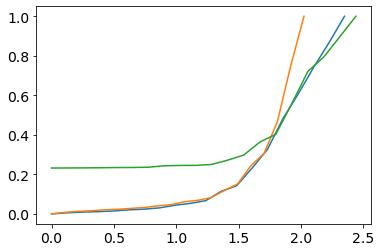

In [15]:
metro_data = np.loadtxt('../results/PARIS/single_metro_t50.csv',delimiter=",")
train_data = np.loadtxt('../results/PARIS/single_train_t50.csv',delimiter=",")
intd_m_tr_data = np.loadtxt('../results/PARIS/Paris_train_metro_new_t50.csv',delimiter=",")

metro_data_scale = metro_data[0]*G_metro_avgk
train_data_scale = train_data[0]*G_train_avgk
intd_m_tr_data_scale = intd_m_tr_data[0]*G_intd_m_tr_avgk

plt.plot(metro_data_scale, metro_data[1])
plt.plot(train_data_scale, train_data[1])
plt.plot(intd_m_tr_data_scale, intd_m_tr_data[1])

results = [metro_data,train_data,intd_m_tr_data]
labels=["metro_data", "train_data", "intd_m_tr_data"]
path="intd_total.png"

# plot_pinf
# plt.rcParams.update({'font.size': 14})
# color = iter(plt.cm.rainbow(np.linspace(0.0, 1, len(results))))
# marker = ['v', 's', 'D', 'v']

# for i, res in enumerate(results):
#     pks = res[0] * k
#     p_infs = res[1]

#     plt.plot(pks, p_infs, c=next(color), linewidth=2)

# if p_theory:
#     plt.vlines(2.4554, ymin=0, ymax=1, colors='k', linestyles='dashdot', label='$p_{c}$=2.4554/<k>')
# if k > 1:
#     plt.xlabel('p<k>')
# else:
#     plt.xlabel('p')
#     # plt.xlabel('$P_{node}$(fail)')
# if residual:
#     plt.hlines(results[0][1][0], xmin=0, xmax=1, linestyles='dotted', colors='k')
# plt.ylabel('$P_{inf}$')
# plt.xlim(2,4)
# plt.ylim(0, 1)
# # plt.ylabel('$P_{node}$(in Gcomponent)')
# if labels:
#     plt.legend(labels)
# plt.savefig(path, dpi=300, bbox_inches='tight')
# plt.grid()
# plt.show()

# plot_pinf([ metro_data, train_data, intd_m_tr_data], 1, labels=["SF, lamda=2.8", "SF, lamda=2.9", "SF, lamda=3.0","ER"], path="../notebooks/figure/SFpinf_282930ER_k4.png", p_theory=False)

# print("Scale-Free(Power Law) Cascade-Failure Figure")
# print("Each point is the mean value of Pinf under Cascade-Failure Trials : 50 times. ")
# print("<k> = 4 ± 0.12")
# print("../notebooks/figure/SFpinf_282930_k4.png")